# Part 1. Testing simple and complex KS test

In [39]:
from scipy.stats import kstest, kstwobign, norm
from numpy import arange, mean, var
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

In [42]:
def plot_first_type_errors_ks():
    error_rates = []
    
    for alpha in tqdm(arange(0, 1, 0.01)):
        samples = [norm.rvs(size=100) for _ in range(100)]
        errors_count = 0
        for sample in samples:   
            statistics = kstest(sample, norm.cdf)[0]
            left = kstwobign.pdf((1 - alpha) / 2, mean(sample), var(sample))
            right = kstwobign.pdf(1 - (1 - alpha) / 2, mean(sample), var(sample))
            if not (left < statistics < right):
                errors_count += 1
        error_rates.append(errors_count / len(samples))
        
    plt.plot(arange(0, 1, 0.01), error_rates)
    plt.title('I-type error distribution')
    plt.xlabel('alpha')
    plt.ylabel('I-type error proba')
    plt.show()

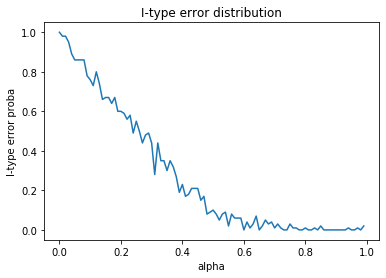

In [43]:
plot_first_type_errors_ks()

As the resulted plot does not look as a line, we can conclude that the criateria becomes conservative.

# Part 2. Chi-squared test for continious distribution (as it was in hw 5)

In [34]:
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
from numpy import arange
from tqdm.notebook import trange, tqdm

In [35]:
def get_proba_region(region):
    return norm.cdf(region[1]) - norm.cdf(region[0])
    
def get_chi2_stats(sample, regions):
    observed_counts = [0 for i in range(len(regions))]
    for element in sample:
        for i, region in enumerate(regions):
            if region[0] < element < region[1]:
                observed_counts[i] += 1
                break
    chi2_stats = 0
    n = len(sample)
    for i in range(len(regions)):
        estimated_count = n * get_proba_region(regions[i])
        chi2_stats += (observed_counts[i] - estimated_count) ** 2 / estimated_count
    return chi2_stats, observed_counts

In [36]:
def generate_first_type_error_for_alpha(alpha, regions):
    left = chi2.ppf((1 - alpha) / 2, df=len(regions)-1)
    right = chi2.ppf(1 - (1 - alpha) / 2, df=len(regions)-1)
    results = [0 if left < get_chi2_stats(norm.rvs(size=100), regions)[0] < right else 1 for i in range(200)]
    return sum(results) / len(results)

In [37]:
def generate_regions_for_number_of_breaks(number_of_regions=9):
    piece_area = 1 / number_of_regions
    regions = []
    used_proba = 0
    cur_start = -1e10
    for i in range(number_of_regions):
        used_proba += piece_area
        cur_end = norm.ppf(used_proba)
        regions.append((cur_start, cur_end))
        cur_start = cur_end
    regions[-1] = (regions[-1][0], 1e10)
    return regions

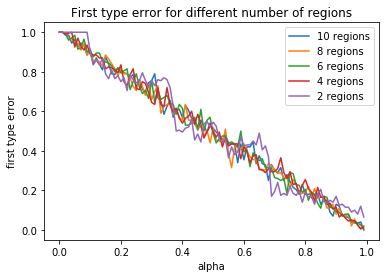

In [38]:
for breaks in tqdm(range(10, 1, -2)):
    regions = generate_regions_for_number_of_breaks(number_of_regions=breaks)
    alphas = []
    first_type_errors = []
    for alpha in arange(0, 1, 0.01):
        alphas.append(alpha)
        first_type_errors.append(generate_first_type_error_for_alpha(alpha, regions))
    plt.plot(alphas, first_type_errors, label=f"{breaks} regions")
plt.title(f'First type error for different number of regions')
plt.xlabel("alpha")
plt.ylabel("first type error")
plt.legend()
plt.show()

Here we can see that the distribution almost doesn't change depending on the discretization of our criteria.